In [1]:
import os
import gc

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

print(os.getcwd())

c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\3.승인매출정보


In [2]:
temp = pd.read_parquet(f"../../data/train/1.회원정보/201807_train_회원정보.parquet")
segment = temp["Segment"]

del temp
gc.collect()

0

In [3]:
sales = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))
    
    temp = pd.read_parquet(f"../../data/train/3.승인매출정보/2018{month:02}_train_승인매출정보.parquet")
    temp["Segment"] = segment
    sales.append(temp)

del temp
gc.collect()

0

In [4]:
for idx, col in enumerate(list(sales[0].columns)):
    if idx % 10 == 1 and idx > 1:
        print(col)
    else:
        print(col, end = ",")

print(idx)

기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,이용건수_신판_B0M,이용건수_일시불_B0M
이용건수_할부_B0M,이용건수_할부_유이자_B0M,이용건수_할부_무이자_B0M,이용건수_부분무이자_B0M,이용건수_CA_B0M,이용건수_체크_B0M,이용건수_카드론_B0M,이용금액_일시불_B0M,이용금액_할부_B0M,이용금액_할부_유이자_B0M
이용금액_할부_무이자_B0M,이용금액_부분무이자_B0M,이용금액_CA_B0M,이용금액_체크_B0M,이용금액_카드론_B0M,이용후경과월_신용,이용후경과월_신판,이용후경과월_일시불,이용후경과월_할부,이용후경과월_할부_유이자
이용후경과월_할부_무이자,이용후경과월_부분무이자,이용후경과월_CA,이용후경과월_체크,이용후경과월_카드론,이용건수_신용_R12M,이용건수_신판_R12M,이용건수_일시불_R12M,이용건수_할부_R12M,이용건수_할부_유이자_R12M
이용건수_할부_무이자_R12M,이용건수_부분무이자_R12M,이용건수_CA_R12M,이용건수_체크_R12M,이용건수_카드론_R12M,이용금액_일시불_R12M,이용금액_할부_R12M,이용금액_할부_유이자_R12M,이용금액_할부_무이자_R12M,이용금액_부분무이자_R12M
이용금액_CA_R12M,이용금액_체크_R12M,이용금액_카드론_R12M,최대이용금액_일시불_R12M,최대이용금액_할부_R12M,최대이용금액_할부_유이자_R12M,최대이용금액_할부_무이자_R12M,최대이용금액_부분무이자_R12M,최대이용금액_CA_R12M,최대이용금액_체크_R12M
최대이용금액_카드론_R12M,이용개월수_신용_R12M,이용개월수_신판_R12M,이용개월수_일시불_R12M,이용개월수_할부_R12M,이용개월수_할부_유이자_R12M,이용개월수_할부_무이자_R12M,이용개월수_부분무이자_R12M,이용개월수_CA_R12M,이용개월수_체크_R12M
이용개월수_카드론_R12M,이용건수_신용_R6M,이용건수_신판

### B0M의 의미?

In [29]:
jul = sales[0]["이용금액_일시불_B0M"]
aug = sales[1]["이용금액_일시불_B0M"]
sep = sales[2]["이용금액_일시불_B0M"]

jul + aug + sep

0          4002
1          8688
2         18401
3          3139
4          2886
          ...  
399995        0
399996    33969
399997    13548
399998        0
399999     9552
Name: 이용금액_일시불_B0M, Length: 400000, dtype: int64

In [42]:
same = sales[2]["이용금액_일시불_R3M"] != jul + aug + sep
summation = jul + aug + sep
(sales[2]["이용금액_일시불_R3M"][same] - summation[same]).value_counts()

 1    187559
 2     43811
-1      9940
-2      1779
Name: count, dtype: int64

## 이용금액

이용금액_일시불_R12M, R6M, B0M, R3M 은 이 순서대로 변수 중요도가 나타났음.

하지만 뭔가 상관성도 높을 것으로 보임.

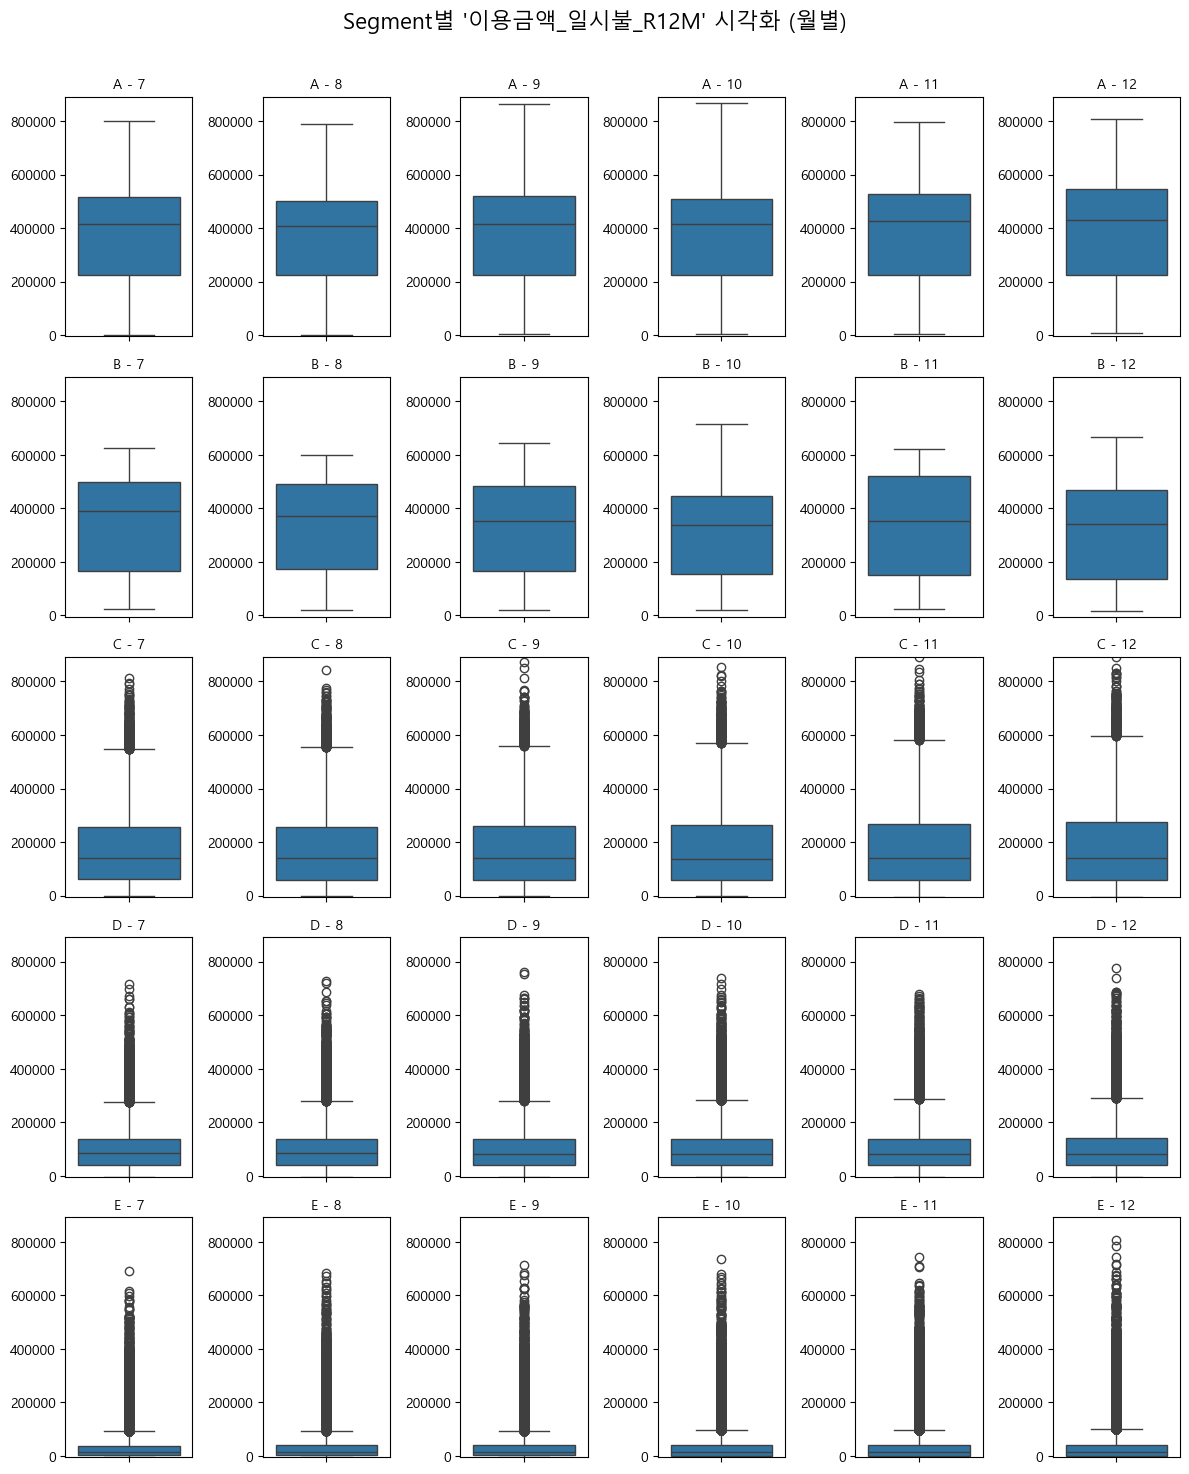

In [5]:
plot_segment_grid(dfs = sales,
                  col = "이용금액_일시불_R12M",
                  is_categorical = False,
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (2, 3))

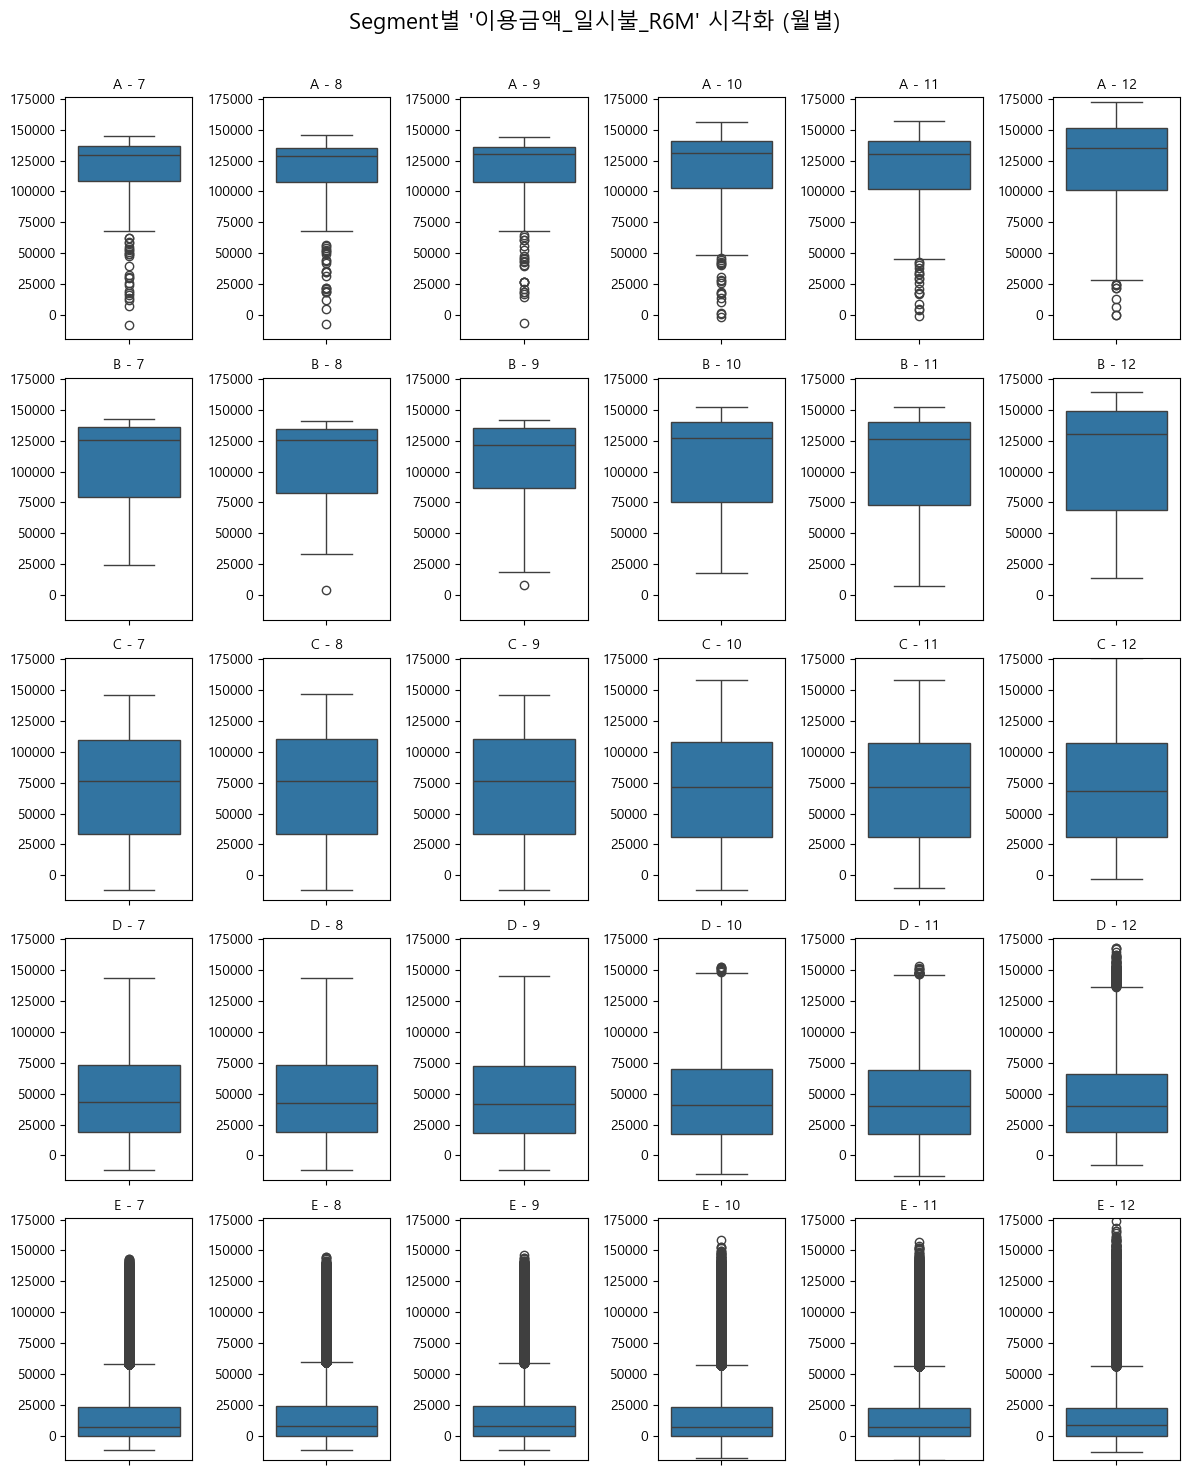

In [6]:
plot_segment_grid(dfs = sales,
                  col = "이용금액_일시불_R6M",
                  is_categorical = False, 
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (2, 3))

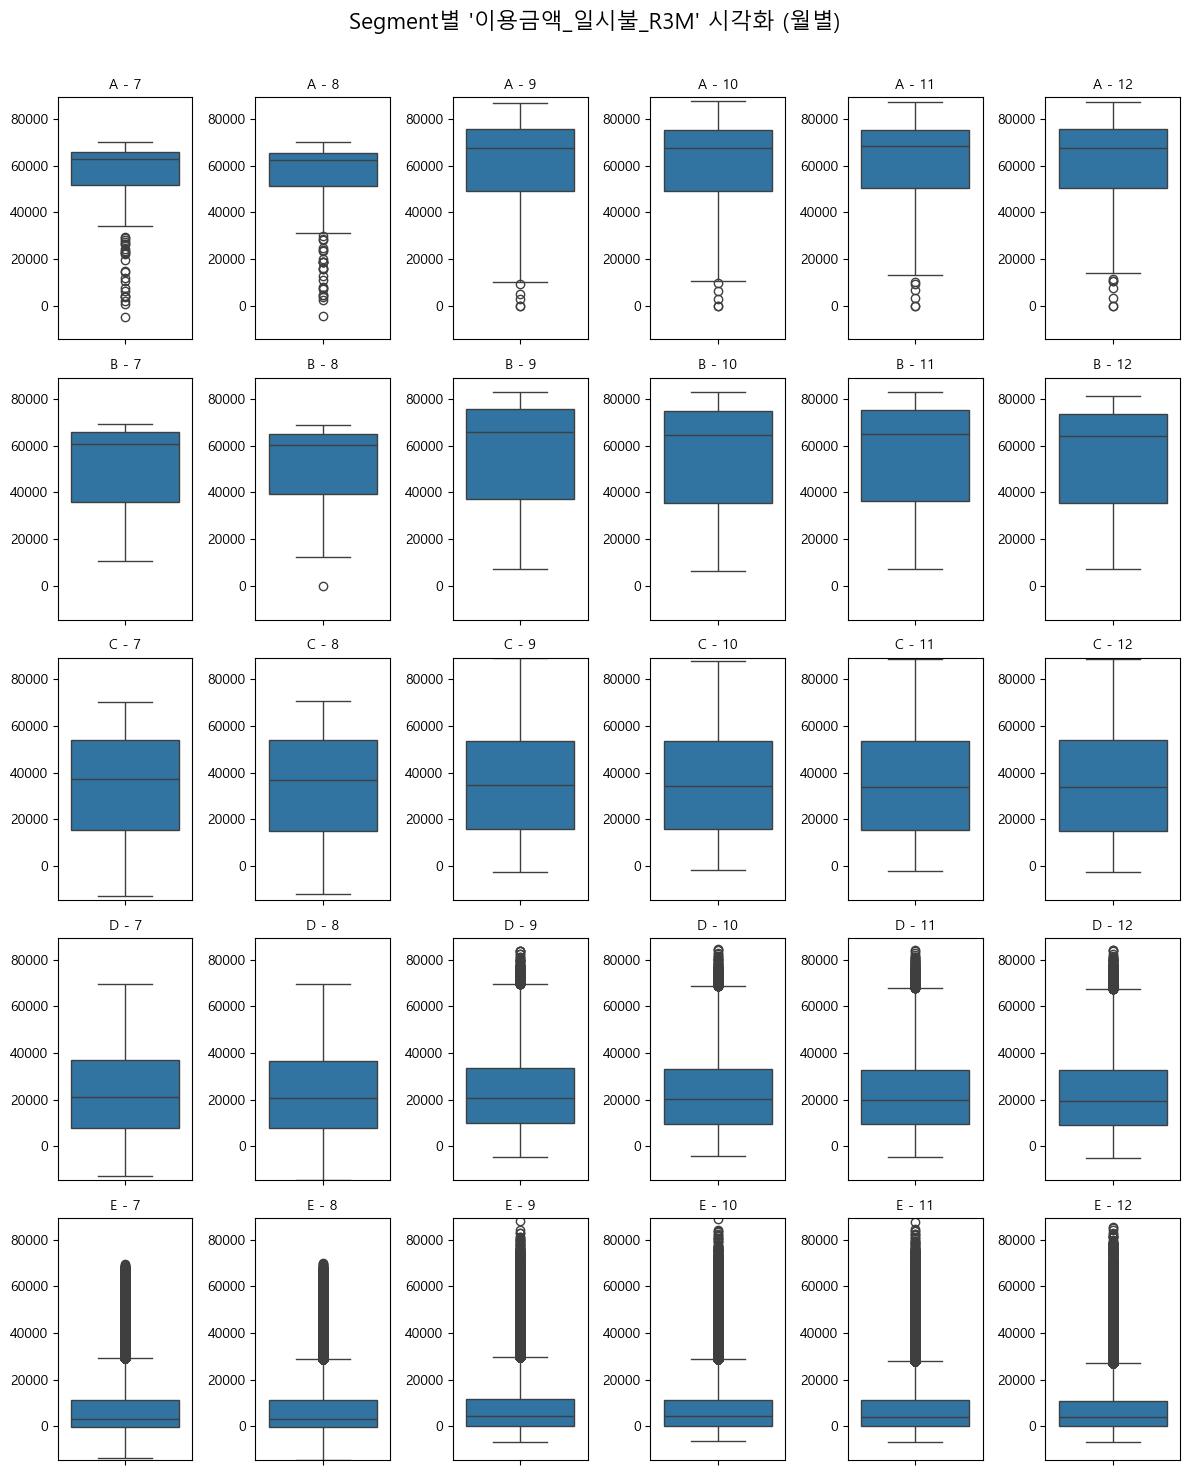

In [7]:
plot_segment_grid(dfs = sales,
                  col = "이용금액_일시불_R3M",
                  is_categorical = False, 
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (2, 3))

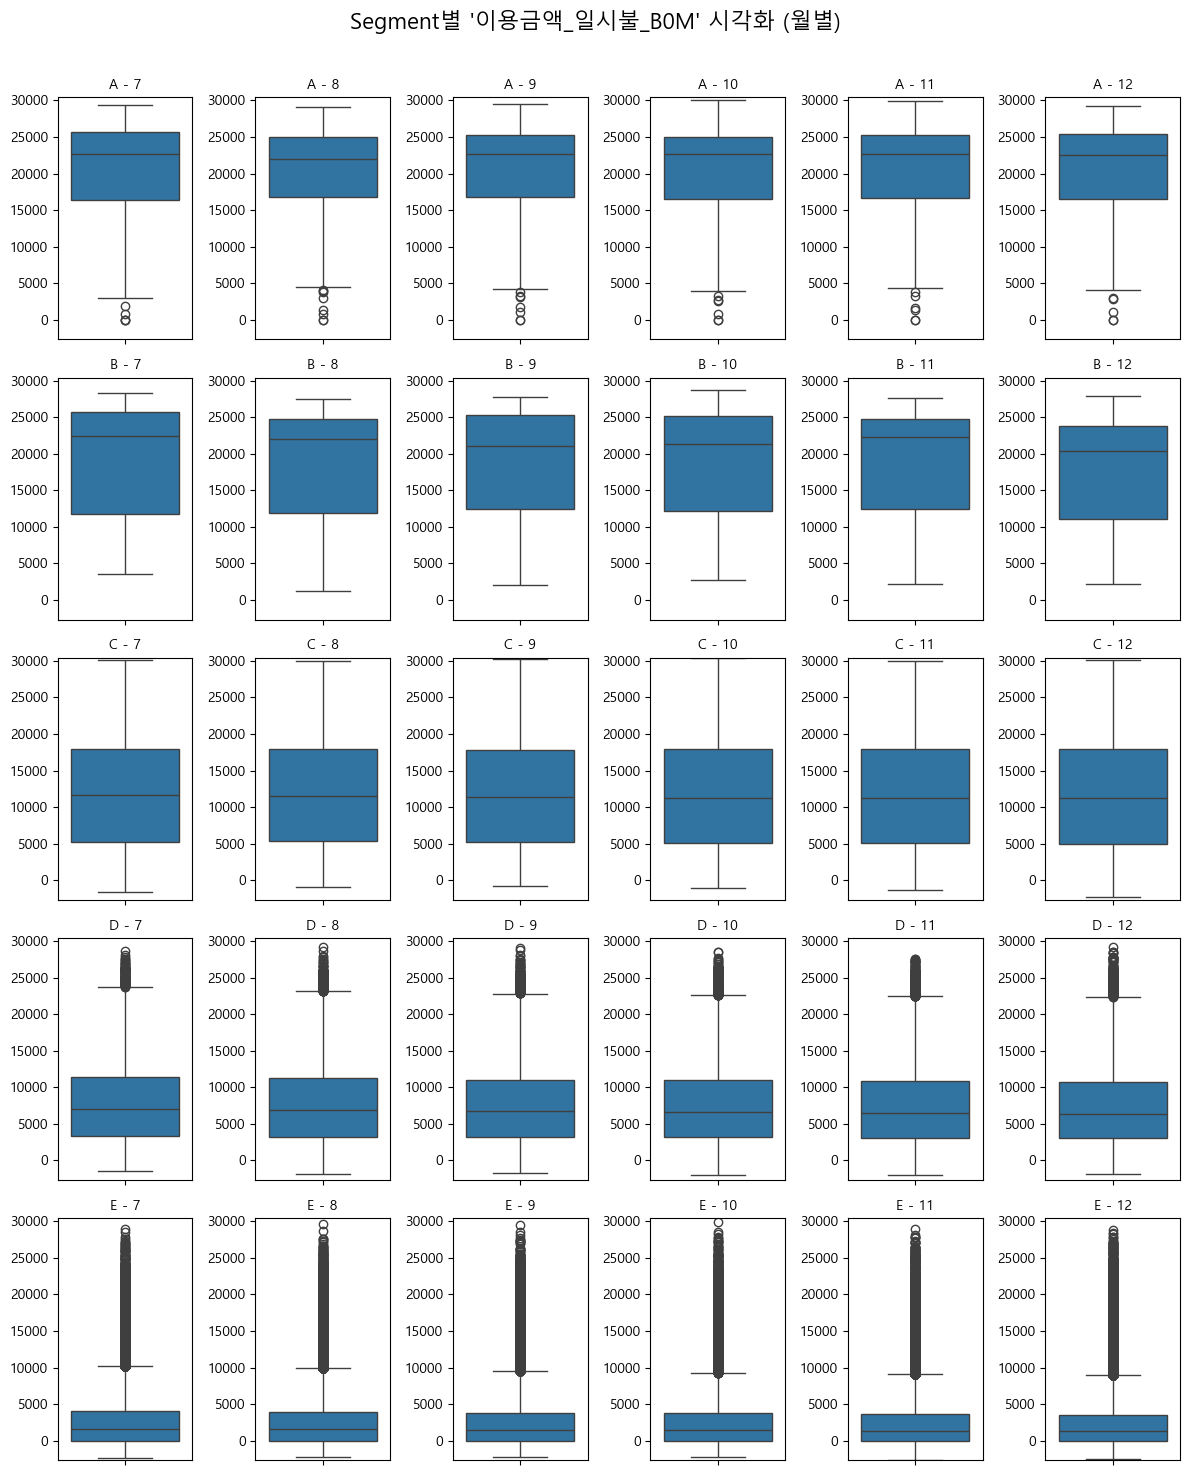

In [8]:
plot_segment_grid(dfs = sales,
                  col = "이용금액_일시불_B0M",
                  is_categorical = False, 
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (2, 3))